<a href="https://colab.research.google.com/github/AIDA-DA/aida-project-image-scene/blob/daniel/Intuitive_Feature_Extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Notebook extracts human intuitive and rule based features like RGB wavelets and gradients.
For example:

1.   Forests are green, mountains and glaciers are blue.
2.   Forests have many vertical edges because of the vertical trunks of the trees.
3.   Streets have many vertical, horizontal edges because of the buildings. 
4.   Streets have many vertical, horizontal edges because of the buildings. 




In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Kaggle

In [73]:
#/content/drive/MyDrive/Kaggle/kaggle.json

kaggle_dir = "/content/gdrive/My Drive/Kaggle"

In [78]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = kaggle_dir

In [ ]:
%pwd

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

In [5]:
%pwd

'/content/gdrive/My Drive/Kaggle'

In [17]:
%ls

kaggle.json  seg_pred/  seg_test/  seg_train/


In [77]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [10]:
api.dataset_download_files('puneet6060/intel-image-classification', unzip=True)

# Globals and Constants

In [2]:
import os
#images_dir_train = '/content/gdrive/MyDrive/Kaggle/seg_train/seg_train'
images_dir_train = '/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train'


In [3]:
RED   = 0
GREEN = 1
BLUE  = 2

In [4]:
class_names = os.listdir(images_dir_train)
n_classes = len(class_names)

In [5]:
print('class_names: ', class_names)
print('n_classes: ', n_classes)

class_names:  ['buildings', 'mountain', 'glacier', 'sea', 'street', 'forest']
n_classes:  6


# Download some images

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [7]:
BATCH_SIZE = 16

In [8]:
image_gen = ImageDataGenerator(rescale=1./255.,
                                   #rotation_range=45,
                                   #width_shift_range=0.5,
                                   #height_shift_range=0.5,
                                   #shear_range=5,
                                   #zoom_range=0.7,
                                   #horizontal_flip=True,
                                   #vertical_flip=True,
                                  )

In [9]:
train_img_iterator = image_gen.flow_from_directory( 
                                    images_dir_train,
                                    #target_size = TARGET_SIZE,
                                    batch_size  = BATCH_SIZE,
                                    class_mode  = 'categorical',
                                    shuffle     = True
                                    )

Found 14034 images belonging to 6 classes.


In [10]:
train_img_iterator.num_classes

6

In [11]:
train_img_iterator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [12]:
class_index_dict = {y:x for x,y in train_img_iterator.class_indices.items()}
class_index_dict

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

## Classes Distribution

<BarContainer object of 6 artists>

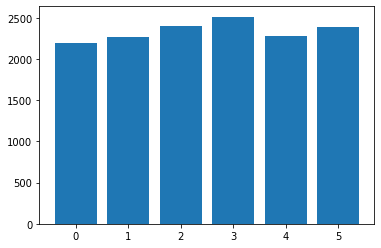

In [12]:
b_cnt, b__ = np.histogram(train_img_iterator.classes, bins=train_img_iterator.num_classes)
plt.bar( range(train_img_iterator.num_classes), b_cnt )

In [13]:
train_img_iterator.filenames[ :5]

['buildings/0.jpg',
 'buildings/10006.jpg',
 'buildings/1001.jpg',
 'buildings/10014.jpg',
 'buildings/10018.jpg']

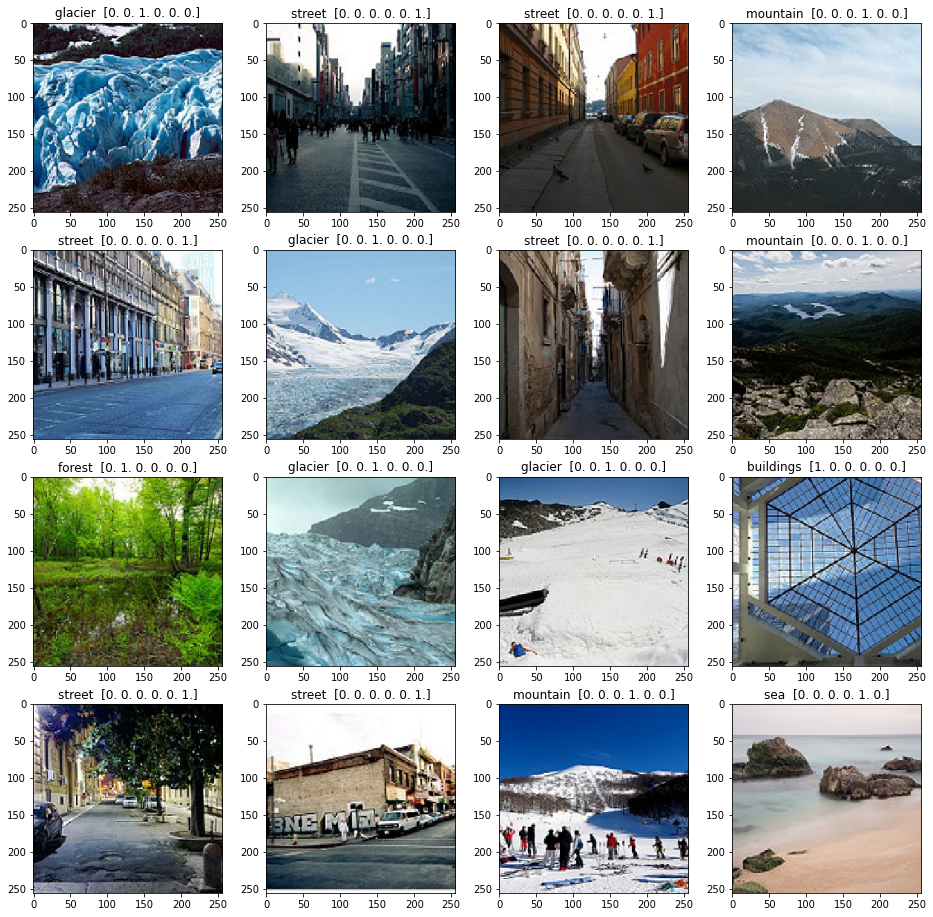

In [25]:
data_batch = train_img_iterator.next()

#class_index_dict = {y:x for x,y in train_img_iterator.class_indices.items()}

imgs   = data_batch[0]
labels = data_batch[1]

fig__, axs = plt.subplots(4, round(imgs.shape[0]/4), figsize=(16,16))

for i in range(BATCH_SIZE):
  axs.flat[i].imshow(imgs[i])
  axs.flat[i].set_title( str(  str(class_index_dict[np.argmax(labels[i])])[:10] + '  ' + str(labels[i])) )
#  axs.flat[i].set_title( labels[i] )
plt.show()

# Statistics

In [13]:
import pandas as pd

In [14]:

df_Data_train = None


In [14]:
del df_Data_train

In [15]:

if df_Data_train is None:
  print('create df_Data_train')
  df_Data_train = pd.DataFrame(columns=[ 'ClassName', 'Class', 'R', 'G', 'B'])

df_Data_train


create df_Data_train


,ClassName,Class,R,G,B


## Color Statistics

In [16]:
def get_RGB_mean(img):
  r = round( img[:,:,0].mean(), 1)
  g = round( img[:,:,1].mean(), 1)
  b = round( img[:,:,2].mean(), 1)
  return r,g,b

def get_RGB_max(img):
  r = round( img[:,:,0].max(), 1)
  g = round( img[:,:,1].max(), 1)
  b = round( img[:,:,2].max(), 1)
  return r,g,b

def get_RGB_min(img):
  r = round( img[:,:,0].min(), 1)
  g = round( img[:,:,1].min(), 1)
  b = round( img[:,:,2].min(), 1)
  return r,g,b

def get_RGB_std(img):
  r = round( img[:,:,0].std(), 1)
  g = round( img[:,:,1].std(), 1)
  b = round( img[:,:,2].std(), 1)
  return r,g,b


## Color Spectrum for different Classes

In [17]:
def get_Histogramm(img, channel, range=(0.0, 1.0), steps_=4):
  return np.histogram( img[ : : steps_, : : steps_, channel].flatten(), range=range )

In [18]:

def plot_RGB_Histogram( img, range_=(0.0, 1.0) ):

  fig__, axs = plt.subplots(1, 4, figsize=(30,4))
  axs.flat[0].imshow(img)

  b_cnt, b__ = get_Histogramm(img, RED, range=range_)
  #print('b_cnt', b_cnt)
  axs.flat[1].bar( range(len(b_cnt)), b_cnt, color='red')

  b_cnt, b__ = get_Histogramm(img, GREEN, range=range_)
  axs.flat[2].bar( range(len(b_cnt)), b_cnt, color='green')

  b_cnt, b__ = get_Histogramm(img, BLUE, range=range_)
  axs.flat[3].bar( range(len(b_cnt)), b_cnt, color='blue')

  plt.show()


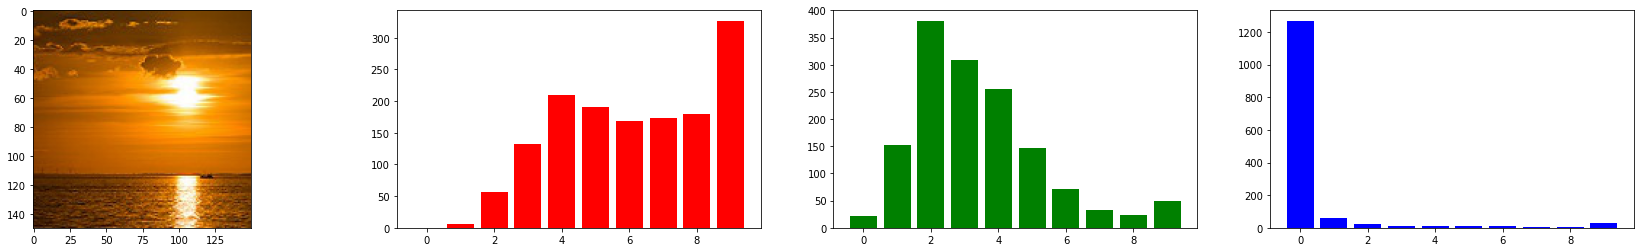

In [19]:
plot_RGB_Histogram( plt.imread('/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train/sea/200.jpg'), range_=(0,255.0) )

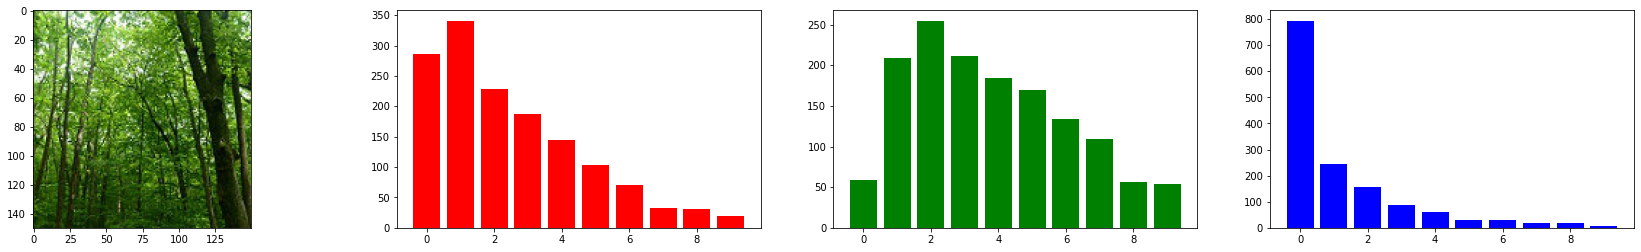

In [22]:
plot_RGB_Histogram( plt.imread('/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train/forest/8.jpg'), range_=(0,255.0) )

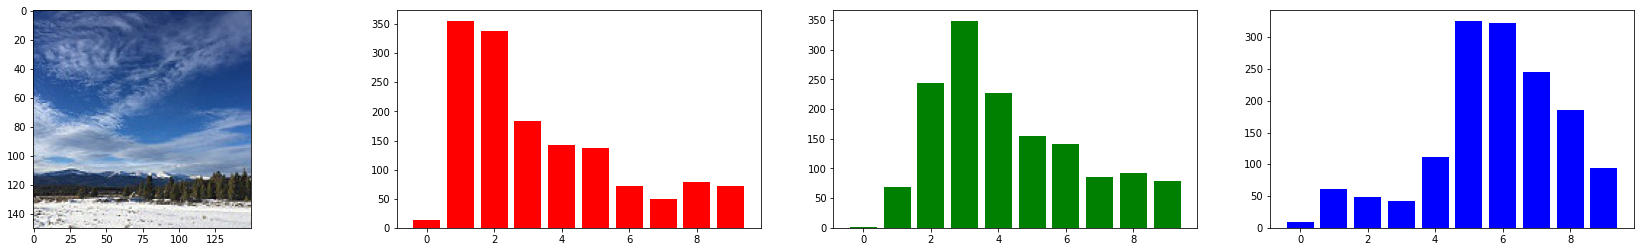

In [23]:
plot_RGB_Histogram( plt.imread('/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train/mountain/32.jpg'), range_=(0,255.0) )

In [20]:

def dict_from_bins( bins, col_prefix='' ):
  keys = [col_prefix + str(i) for i in range( len(bins) )]
  vals = list(bins)
  return dict( zip(keys, vals) )


### Data Getter and Builder Function

In [21]:

def get_build_data_table(df_Data_, iterations_):

  for it in range(iterations_):

    if (it % 2) == 0:
      print('Still fetching data and building data table ', it)

    data_batch = train_img_iterator.next()

    imgs   = data_batch[0]
    labels = data_batch[1]

    for img, lbl in zip(imgs, labels):

      (r,g,b) = get_RGB_mean(img)

      row1 = {
                  'ClassName' : class_index_dict[np.argmax(lbl)] , 
                  'Class'     : np.argmax(lbl),              
                  'R'         : r, 
                  'G'         : g, 
                  'B'         : b
                  }

      # one-hot-encoded labels
      c_dict = dict_from_bins( lbl, col_prefix='C_')

      r_dict = dict_from_bins( get_Histogramm(img, RED)[0],   col_prefix='R_')
      g_dict = dict_from_bins( get_Histogramm(img, GREEN)[0], col_prefix='G_')
      b_dict = dict_from_bins( get_Histogramm(img, BLUE)[0],  col_prefix='B_')

      # Concat the dictonaries per row
      new_row = {**row1, **c_dict, **r_dict, **g_dict, **b_dict} 

      # append a row
      df_Data_ = df_Data_.append( new_row, ignore_index=True )

  return df_Data_
  

### RGB Min-Max-Scaler Function

In [26]:

def min_max_scaler_RGB(df_Data_):

  max_ = df_Data_.filter( regex='^R_|^G_|^B_', axis=1).max().max()
  min_ = df_Data_.filter( regex='^R_|^G_|^B_', axis=1).min().min()

  for col in df_Data_:
    if col.startswith('R_') or col.startswith('G_') or col.startswith('B_') :
      df_Data_[col] = df_Data_[col].apply( lambda x: ((x - min_) / (max_ - min_)) )

  return df_Data_


In [22]:
def get_MinMaxRGB(df_Data_):
  return df_Data_.filter( regex='^R_|^G_|^B_', axis=1).min().min(), df_Data_.filter( regex='^R_|^G_|^B_', axis=1).max().max()

### RGB Zero-Mean-Scaler

In [95]:
def zero_mean_scaler_RGB(df_Data_):

  df_Data_ = min_max_scaler_RGB(df_Data_)

  for col in df_Data_:
    if col.startswith('R_') or col.startswith('G_') or col.startswith('B_') :
      df_Data_[col] = df_Data_[col].apply( lambda x: (x - 0.5)  )

  return df_Data_


## Now get the data and build the data table...

In [23]:
df_Data_train = get_build_data_table(df_Data_train, 5)

Still fetching data and building data table  0
Still fetching data and building data table  2
Still fetching data and building data table  4


## ... and scale the data

In [27]:
df_Data_train = min_max_scaler_RGB(df_Data_train)

#df_Data_train = zero_mean_scaler_RGB(df_Data_train)


In [28]:
get_MinMaxRGB(df_Data_train)

(0.0, 1.0)

In [29]:
df_Data_train

,ClassName,Class,R,G,B,B_0,B_1,B_2,B_3,B_4,B_5,B_6,B_7,B_8,B_9,C_0,C_1,C_2,C_3,C_4,C_5,G_0,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,R_0,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9
0,mountain,3,0.5,0.5,0.5,0.336907,0.170291,0.012251,0.030015,0.067381,0.006738,0.007044,0.231547,0.392037,0.000306,0.0,0.0,0.0,1.0,0.0,0.0,0.398775,0.117917,0.002144,0.028178,0.069219,0.004594,0.013476,0.202757,0.405207,0.012251,0.477489,0.039510,0.002450,0.028178,0.066156,0.006738,0.043798,0.251149,0.241348,0.097703
1,street,5,0.4,0.4,0.4,0.198469,0.195712,0.150383,0.154364,0.129862,0.095559,0.088821,0.045942,0.030628,0.164778,0.0,0.0,0.0,0.0,0.0,1.0,0.169372,0.191424,0.139357,0.109342,0.153752,0.116692,0.155896,0.181623,0.032466,0.004594,0.178560,0.180092,0.135681,0.066462,0.120368,0.161715,0.180398,0.105054,0.096478,0.029709
2,mountain,3,0.6,0.6,0.6,0.034303,0.073813,0.107198,0.080245,0.127412,0.100153,0.111485,0.440123,0.151302,0.028484,0.0,0.0,0.0,1.0,0.0,0.0,0.034303,0.073813,0.107198,0.080245,0.127412,0.100153,0.111485,0.440123,0.151302,0.028484,0.034303,0.073813,0.107198,0.080245,0.127412,0.100153,0.111485,0.440123,0.151302,0.028484
3,sea,4,0.6,0.6,0.7,0.057580,0.054211,0.050230,0.045023,0.095865,0.156815,0.159571,0.053292,0.231547,0.350383,0.0,0.0,0.0,0.0,1.0,0.0,0.063093,0.056662,0.045636,0.061256,0.152527,0.172435,0.098622,0.033997,0.562328,0.007963,0.075038,0.060643,0.050842,0.130475,0.210413,0.101991,0.036753,0.438591,0.143645,0.006126
4,buildings,0,0.4,0.5,0.5,0.139357,0.152527,0.135069,0.103216,0.098009,0.118836,0.176723,0.069219,0.056049,0.205513,1.0,0.0,0.0,0.0,0.0,0.0,0.118224,0.160184,0.123430,0.113017,0.122205,0.114242,0.171822,0.124655,0.183155,0.023583,0.080245,0.149158,0.158652,0.141807,0.142726,0.232159,0.222052,0.085145,0.020521,0.022052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,glacier,2,0.4,0.5,0.5,0.140582,0.063706,0.128943,0.081164,0.207963,0.162634,0.113017,0.165391,0.173660,0.017458,0.0,0.0,1.0,0.0,0.0,0.0,0.149464,0.041041,0.102910,0.313629,0.114548,0.081164,0.105360,0.157427,0.171210,0.017764,0.159265,0.087596,0.220827,0.155590,0.113323,0.078101,0.108729,0.149464,0.165697,0.015926
76,forest,1,0.4,0.4,0.4,0.013783,0.150689,0.437366,0.290965,0.151302,0.084533,0.053905,0.038591,0.020521,0.012864,0.0,1.0,0.0,0.0,0.0,0.0,0.012864,0.156508,0.411332,0.284839,0.139051,0.065237,0.060031,0.054518,0.044410,0.025727,0.008882,0.111792,0.408270,0.311485,0.155590,0.082083,0.061868,0.056662,0.035835,0.022052
77,glacier,2,0.4,0.5,0.5,0.058806,0.065544,0.080551,0.167228,0.197856,0.158346,0.159265,0.144870,0.152221,0.069832,0.0,0.0,1.0,0.0,0.0,0.0,0.074732,0.066462,0.131087,0.178560,0.189587,0.169985,0.189587,0.160184,0.067994,0.026340,0.093721,0.129556,0.187136,0.193874,0.192649,0.174579,0.140276,0.078714,0.040123,0.023890
78,glacier,2,0.4,0.4,0.4,0.178254,0.181011,0.162021,0.056662,0.060949,0.132006,0.187136,0.141807,0.083614,0.071057,0.0,0.0,1.0,0.0,0.0,0.0,0.117305,0.249617,0.158346,0.100459,0.121899,0.124043,0.131700,0.111485,0.073201,0.066462,0.135069,0.236141,0.199387,0.134763,0.098009,0.100153,0.116386,0.102910,0.068300,0.063400


## Color Spectrum

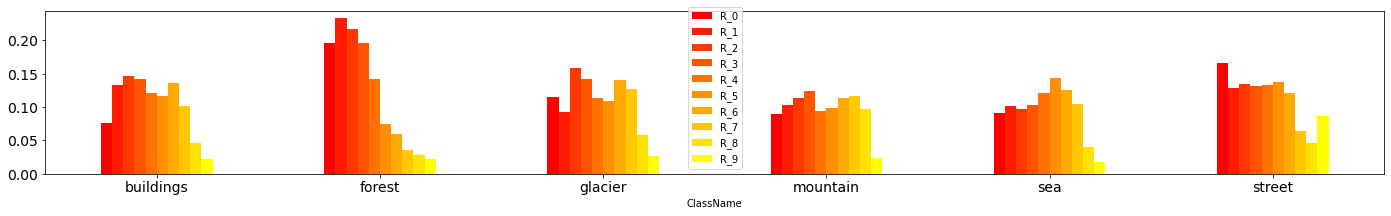

In [30]:
df_Data_train.filter( regex='^R_|ClassName', axis=1).groupby(['ClassName']).median().plot.bar(  fontsize=14, figsize=(24,3), colormap='autumn', rot=0);  plt.show()

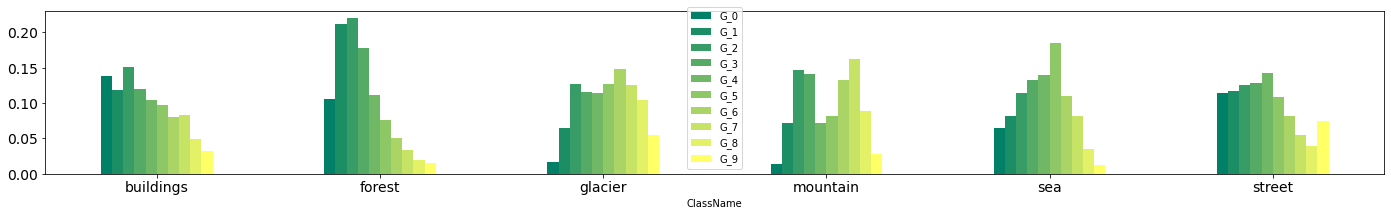

In [33]:
df_Data_train.filter( regex='^G_|ClassName', axis=1).groupby(['ClassName']).median().plot.bar(  fontsize=14, figsize=(24,3), colormap='summer', rot=0);  plt.show()

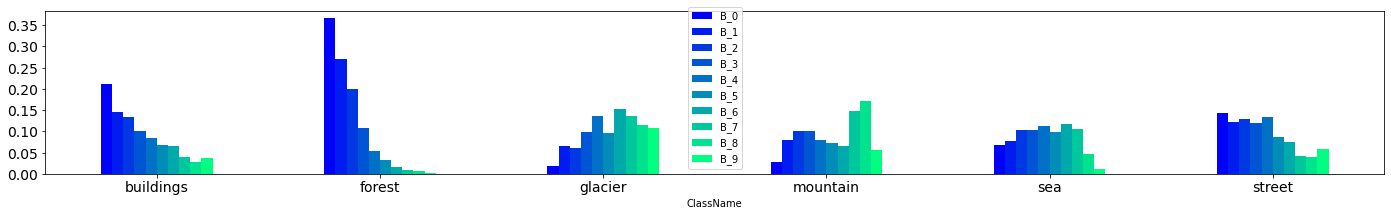

In [34]:
df_Data_train.filter( regex='^B_|ClassName', axis=1).groupby(['ClassName']).median().plot.bar(  fontsize=14, figsize=(24,3), colormap='winter', rot=0);  plt.show()

### Count of classes in DataFrame

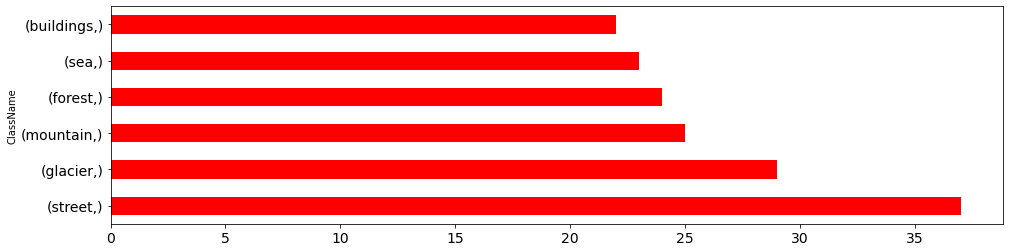

In [35]:
df_Data_train.value_counts(['ClassName']).plot.barh(color='red', fontsize=14, figsize=(16,4))

### Mean Color

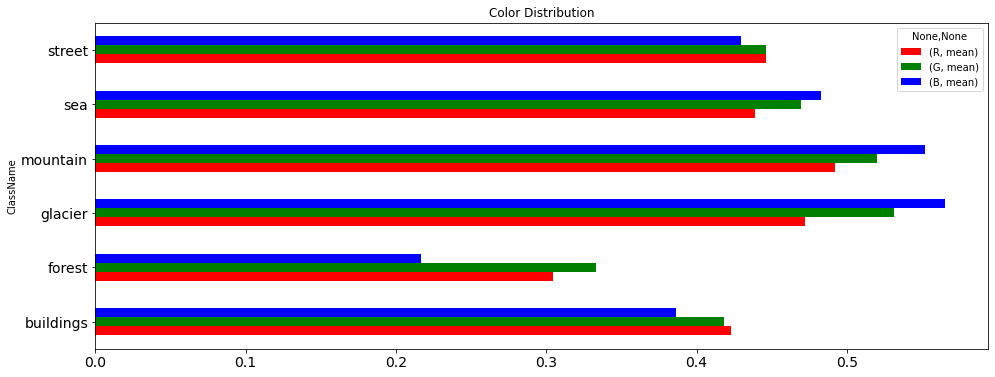

In [37]:

df_Data_train.groupby(['ClassName'])[['R', 'G', 'B']].agg(['mean']).plot.barh( color=['r','g','b'], fontsize=14, figsize=(16,6), title='Color Distribution' )


## Extract the X-Input-Feature-Matrix and the Y-Label-Vector

In [31]:
def get_X_Input_Feature_Matrix(df_Data_):
  return df_Data_.filter( regex='R|G|B|^R_|^G_|^B_', axis=1).to_numpy()

In [32]:
def get_y_Label_Vector_OneHot(df_Data_):
  return df_Data_.filter( regex='^C_', axis=1).to_numpy()

def get_y_Label_Vector(df_Data_):
  return df_Data_['Class'].to_numpy()

In [33]:
X_train = get_X_Input_Feature_Matrix(df_Data_train)
y_train = get_y_Label_Vector(df_Data_train)

print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)

X_train.shape: (80, 33)
y_train.shape: (80,)


# Classifier

In [38]:
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

In [36]:
model = MultinomialNB()

In [42]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, list(y_train))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [43]:
y_pred = lin_clf.predict(X_train)

In [45]:
y_train

array([3, 5, 3, 4, 0, 1, 5, 0, 1, 0, 4, 4, 4, 2, 0, 4, 3, 4, 3, 3, 0, 5,
       0, 4, 0, 3, 2, 4, 3, 2, 2, 4, 4, 3, 3, 0, 4, 4, 3, 2, 1, 1, 0, 0,
       0, 1, 2, 5, 5, 4, 4, 2, 5, 4, 1, 4, 4, 1, 4, 1, 2, 2, 3, 3, 3, 4,
       1, 0, 3, 4, 5, 0, 5, 1, 4, 2, 1, 2, 2, 0], dtype=object)

In [44]:
y_pred

array([3, 4, 4, 4, 4, 1, 1, 0, 1, 4, 4, 3, 2, 4, 0, 4, 3, 4, 1, 0, 0, 4,
       4, 4, 0, 3, 2, 4, 3, 3, 4, 3, 4, 3, 3, 2, 4, 4, 3, 2, 1, 1, 0, 4,
       0, 1, 2, 1, 0, 3, 4, 1, 0, 4, 1, 4, 1, 1, 4, 1, 4, 0, 4, 4, 3, 4,
       0, 0, 4, 0, 1, 4, 0, 1, 4, 3, 1, 4, 3, 1])

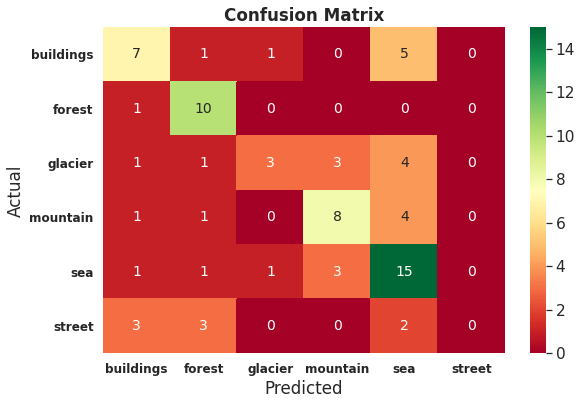

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

conf = confusion_matrix( list(y_train), list(y_pred))
df_cm = pd.DataFrame( conf, columns=list(class_index_dict.values()), index = list(class_index_dict.values()) )
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (9,6))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap='RdYlGn', annot=True, annot_kws={"size": 14})
plt.title("Confusion Matrix", fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()